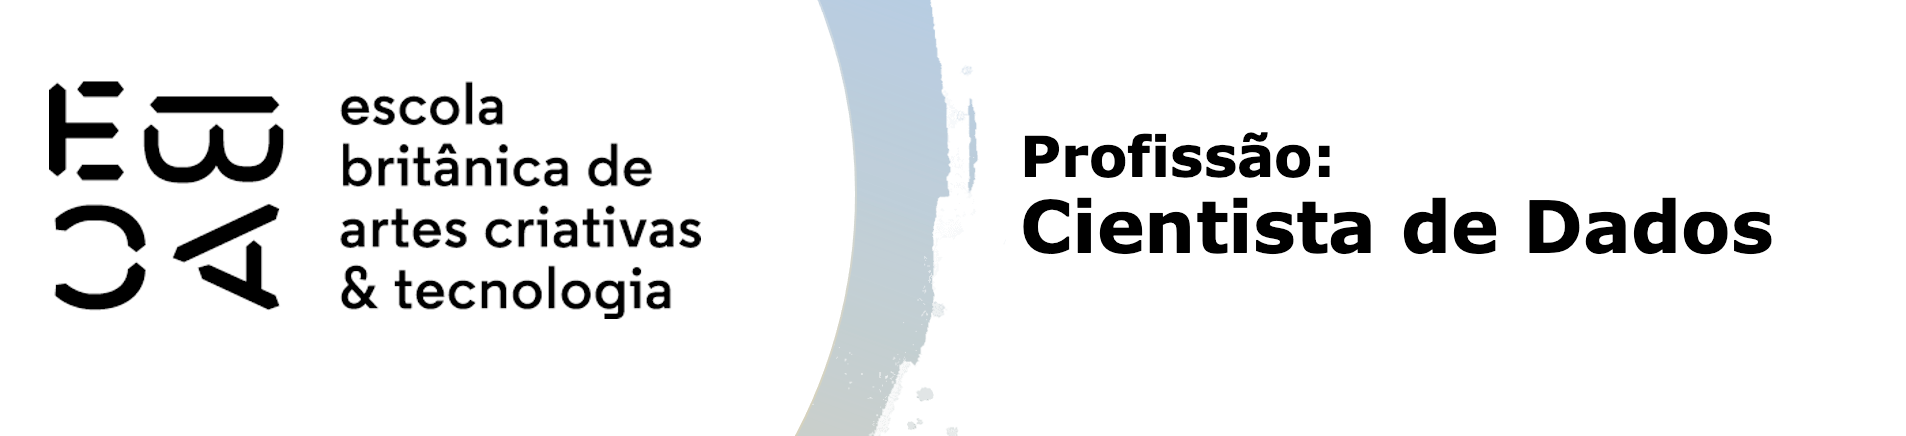

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [3]:
# Criar a variável 'Dia da semana' 
df['Dia da Semana'] = df['Data Emissão'].dt.dayofweek

# Criar a variável 'Fim de semana' (0 para dias úteis, 1 para fins de semana)
df['Fim de Semana'] = df['Dia da Semana'].apply(lambda x: 1 if x >= 5 else 0)

# Criar a variável 'Dia do Mês'
df['Dia do Mês'] = df['Data Emissão'].dt.day

# Criar a variável 'Trimestre'
df['Trimestre'] = df['Data Emissão'].dt.quarter

# Mostrar o cabeçalho para verificar as novas colunas
print(df.head())

           CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  Dia da Semana  \


In [4]:
# Categorizar 'Valor NF' em 5, 10, 20 e 50 categorias
df['Valor NF Quantis 5'] = pd.qcut(df['Valor NF'], q=5, labels=False, duplicates='drop')
df['Valor NF Quantis 10'] = pd.qcut(df['Valor NF'], q=10, labels=False, duplicates='drop')
df['Valor NF Quantis 20'] = pd.qcut(df['Valor NF'], q=20, labels=False, duplicates='drop')
df['Valor NF Quantis 50'] = pd.qcut(df['Valor NF'], q=50, labels=False, duplicates='drop')

# Mostrar o cabeçalho para verificar as novas colunas
print(df.head())

           CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre  ...  flag_credito     categoria Dia da Semana  \
0  201

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [8]:
def calcula_iv(data, feature, target):
    temp = data.groupby(feature)[target].agg(['count', 'sum'])
    temp.columns = ['Total', 'Event']
    temp['Non-Event'] = temp['Total'] - temp['Event']
    
    temp['Prop Event'] = temp['Event'] / temp['Event'].sum()
    temp['Prop Non-Event'] = temp['Non-Event'] / temp['Non-Event'].sum()
    
    # WOE e IV
    temp['WOE'] = np.log(temp['Prop Event'] / temp['Prop Non-Event'])
    temp['IV'] = (temp['Prop Event'] - temp['Prop Non-Event']) * temp['WOE']
    
    iv = temp['IV'].sum()
    
    return iv

In [9]:
# Variáveis criadas para as quais desejamos calcular o IV
variaveis = [
    'Dia da Semana', 
    'Fim de Semana', 
    'Dia do Mês', 
    'Trimestre', 
    'Valor NF Quantis 5',
    'Valor NF Quantis 10',
    'Valor NF Quantis 20',
    'Valor NF Quantis 50'
]

# Calcular o IV para cada variável
iv_values = {var: calcula_iv(df, var, 'flag_credito') for var in variaveis}

# Criar DataFrame de resultados
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Variável', 'IV']).sort_values(by='IV', ascending=False)

print(iv_df)

              Variável        IV
7  Valor NF Quantis 50  0.152315
6  Valor NF Quantis 20  0.124525
5  Valor NF Quantis 10  0.106650
4   Valor NF Quantis 5  0.056695
2           Dia do Mês  0.043719
3            Trimestre  0.011507
0        Dia da Semana  0.006883
1        Fim de Semana  0.004346


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

<p style='color: green'>As variáveis que maior poder de discriminação têm são:</p>
<ul style='color: green'>
<li>Valor NF Quantis 50</li>
<li>Valor NF Quantis 20</li>
<li>Valor NF Quantis 10</li>
</ul>
<p style='color: green'></p>
<p style='color: green'>A análise dos resultados mostra que, conforme o número de categorias para Valor NF aumenta, o IV também tende a aumentar. Isso sugere que dividir os valores em mais grupos captura melhor as diferenças na distribuição de eventos positivos e negativos. No entanto, o aumento no IV não é linear ou garantido</p>

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [11]:
# Análise 1: Quantidade de Notas por Trimestre
notas_por_trimestre = df.groupby('Trimestre').size()

# Análise 2: Quantidade de Notas por Categoria e Trimestre
notas_por_categoria_trimestre = df.groupby(['Trimestre', 'categoria']).size().unstack()

# Análise 3: Proporção de Notas com Crédito por Categoria e Trimestre
# Primeiro, criar uma coluna binária para indicar notas com crédito
df['Tem Crédito'] = df['flag_credito'].apply(lambda x: 1 if x > 0 else 0)

# Calcular a proporção
credito_proporcao = df.groupby(['Trimestre', 'categoria'])['Tem Crédito'].mean().unstack()

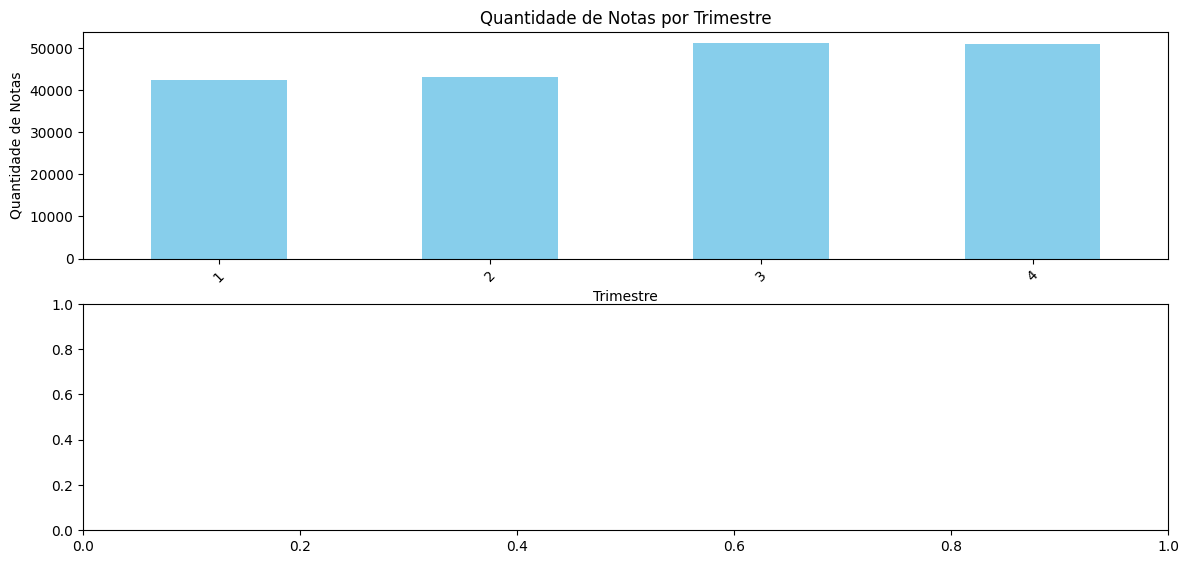

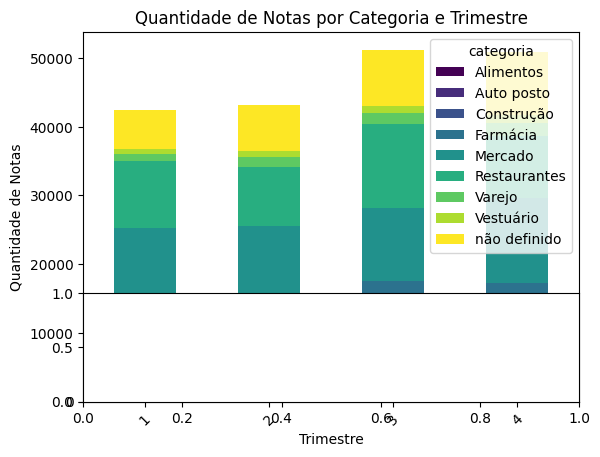

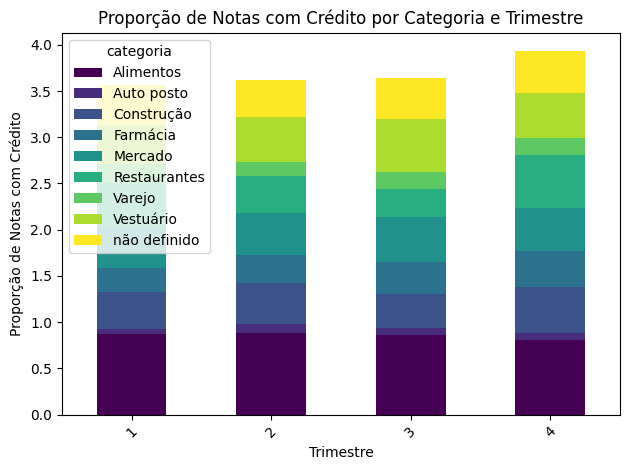

In [12]:
# Visualizações
plt.figure(figsize=(14, 10))

# Quantidade de Notas por Trimestre
plt.subplot(3, 1, 1)
notas_por_trimestre.plot(kind='bar', color='skyblue', title='Quantidade de Notas por Trimestre')
plt.ylabel('Quantidade de Notas')
plt.xticks(rotation=45)

# Quantidade de Notas por Categoria e Trimestre
plt.subplot(3, 1, 2)
notas_por_categoria_trimestre.plot(kind='bar', stacked=True, colormap='viridis', title='Quantidade de Notas por Categoria e Trimestre')
plt.ylabel('Quantidade de Notas')
plt.xticks(rotation=45)

# Proporção de Notas com Crédito por Categoria e Trimestre
plt.subplot(3, 1, 3)
credito_proporcao.plot(kind='bar', stacked=True, colormap='viridis', title='Proporção de Notas com Crédito por Categoria e Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [14]:
def calculate_woe_iv(data, feature, target):
    # Tabela de contagem
    temp = data.groupby(feature)[target].agg(['count', 'sum'])
    temp.columns = ['Total', 'Event']
    temp['Non-Event'] = temp['Total'] - temp['Event']
    
    # Proporções
    temp['Prop Event'] = temp['Event'] / temp['Event'].sum()
    temp['Prop Non-Event'] = temp['Non-Event'] / temp['Non-Event'].sum()
    
    # Calcular WOE e IV
    temp['WOE'] = np.log(temp['Prop Event'] / temp['Prop Non-Event'])
    temp['IV'] = (temp['Prop Event'] - temp['Prop Non-Event']) * temp['WOE']
    
    return temp[['WOE', 'IV']]

In [15]:
# Criar um DataFrame para armazenar IV por trimestre
iv_time_series = pd.DataFrame()

In [16]:
# Loop for pora cada trimestre
for trimestre in df['Trimestre'].unique():
    df_trimestre = df[df['Trimestre'] == trimestre]
    
    woe_iv = calculate_woe_iv(df_trimestre, 'categoria', 'flag_credito')
    
    woe_iv['Trimestre'] = trimestre
    iv_time_series = pd.concat([iv_time_series, woe_iv])


# Resumo do IV por trimestre
iv_summary = iv_time_series.groupby('Trimestre')['IV'].sum().reset_index()

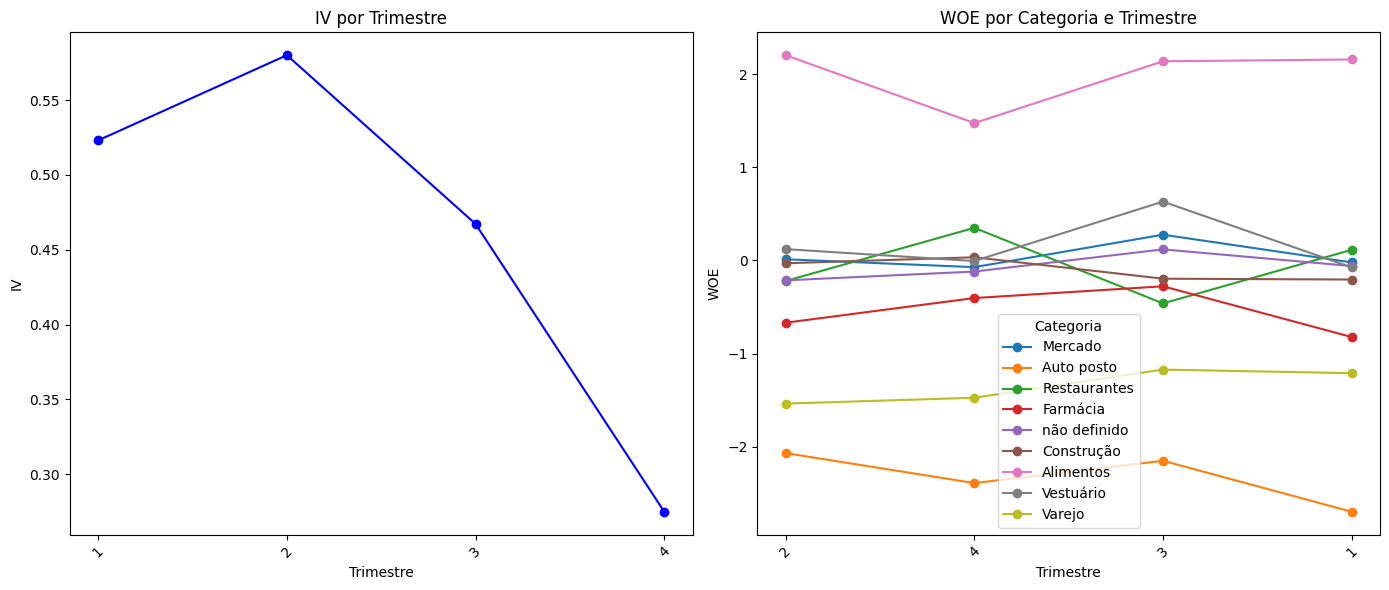

In [17]:
# Visualizar WOE e IV ao longo do tempo
plt.figure(figsize=(14, 6))

# IV ao longo do tempo
plt.subplot(1, 2, 1)
plt.plot(iv_summary['Trimestre'].astype(str), iv_summary['IV'], marker='o', color='b')
plt.title('IV por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('IV')
plt.xticks(rotation=45)

# WOE por categoria ao longo do tempo
plt.subplot(1, 2, 2)
for categoria in df['categoria'].unique():
    woe_time_series = iv_time_series[iv_time_series.index == categoria].reset_index()
    plt.plot(woe_time_series['Trimestre'].astype(str), woe_time_series['WOE'], marker='o', label=categoria)
    
plt.title('WOE por Categoria e Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('WOE')
plt.xticks(rotation=45)
plt.legend(title='Categoria')

plt.tight_layout()
plt.show()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

In [18]:
# Filtrando os dados (a partir de jan 2020)
df_pos_2020 = df[df['Data Emissão'] >= '2020-01-01']

In [19]:
# Calcular a proporção de notas com crédito por categoria e trimestre
credito_proporcao_pos_2020 = (
    df_pos_2020.groupby(['Trimestre', 'categoria'])['Tem Crédito']
)

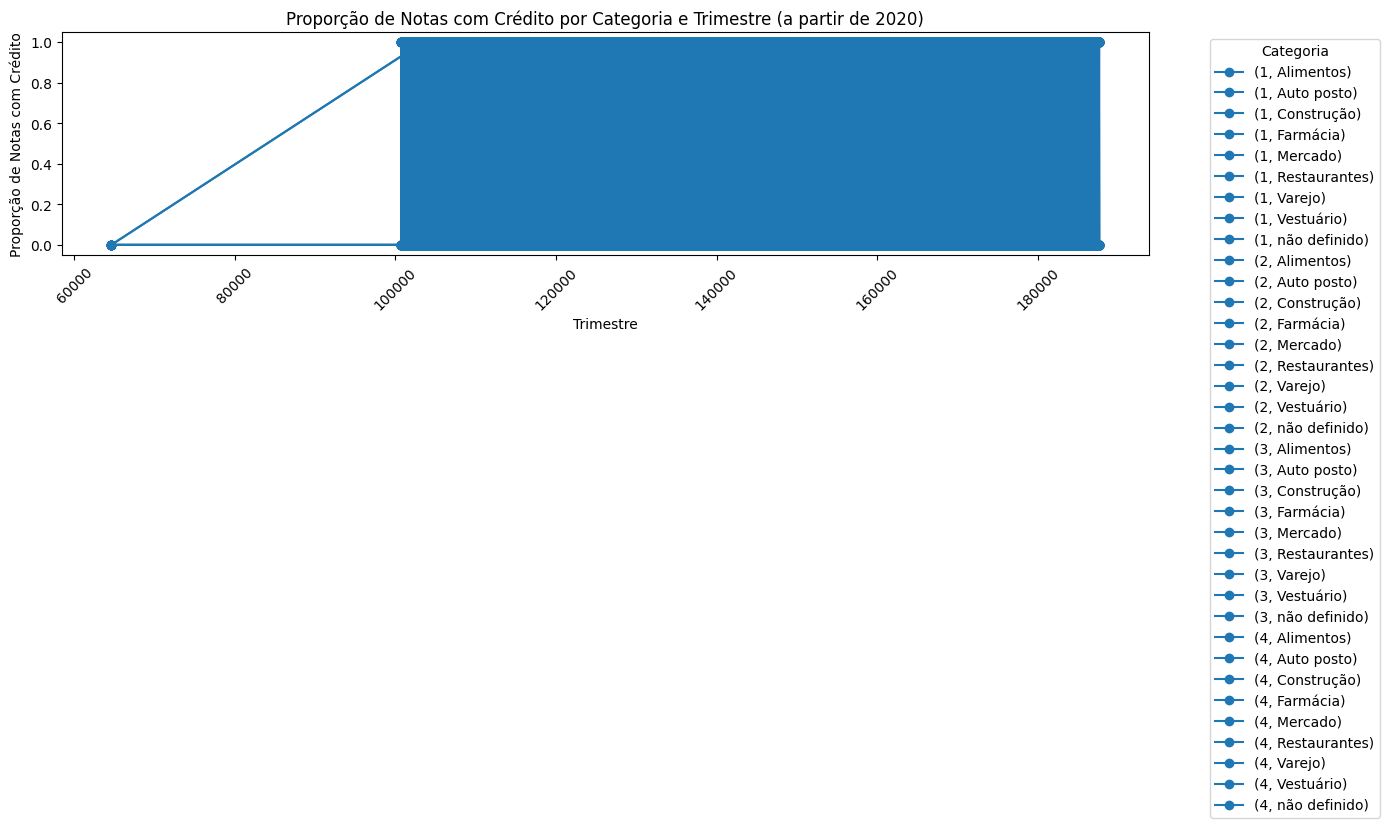

In [20]:
# Visualizar a proporção de notas com crédito por categoria ao longo do tempo (apenas pós-2020)
plt.figure(figsize=(14, 6))
credito_proporcao_pos_2020.plot(kind='line', marker='o', colormap='tab20', title='Proporção de Notas com Crédito por Categoria e Trimestre (a partir de 2020)')
plt.ylabel('Proporção de Notas com Crédito')
plt.xlabel('Trimestre')
plt.xticks(rotation=45)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
# Calcular a média geral de proporções para identificar as categorias mais consistentes
categoria_credito_media = credito_proporcao_pos_2020.mean().sort_values(ascending=False)
categoria_credito_media

Trimestre  categoria   
1          Restaurantes    0.782493
3          Restaurantes    0.773879
1          Alimentos       0.708268
2          Restaurantes    0.701878
4          Restaurantes    0.699588
3          Alimentos       0.691932
4          Alimentos       0.690684
2          Alimentos       0.630677
3          Construção      0.491297
1          Mercado         0.486249
4          Mercado         0.478073
3          Mercado         0.475116
2          Mercado         0.473227
4          Construção      0.470752
1          Construção      0.469901
2          Construção      0.441408
4          Farmácia        0.439169
1          não definido    0.393102
3          não definido    0.368122
           Farmácia        0.367069
4          não definido    0.367048
2          Farmácia        0.327849
           não definido    0.323842
3          Auto posto      0.301471
1          Vestuário       0.268065
           Farmácia        0.262336
3          Vestuário       0.260965
2   

#### CONCLUSÃO

Com base nos resultados da análise acima, as categorias que apresentam a maior proporção de notas com retorno (flag_credito > 0) consistentemente ao longo do tempo (a partir de 2020) podem ser identificadas a partir da média geral de proporções:

<span style='font-weight: bold'>Categorias de Destaque:</span>
* As categorias que mostram consistentemente proporções mais altas de notas com crédito são as que aparecem no topo do categoria_credito_media.

<span style='font-weight: bold'>Estabilidade ao Longo do Tempo</span>
* Estabilidade:
Ao visualizar o gráfico de proporção de notas com crédito por categoria ao longo dos trimestres pós-2020, podemos observar se as categorias mantêm suas proporções ao longo do tempo.
Algumas categorias podem apresentar flutuações, enquanto outras mostram estabilidade em suas proporções.
